<a href="https://colab.research.google.com/github/AliBeidoun24/PersonalProjects/blob/Machine-Learning-Project/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SSD.HDD.csv to SSD.HDD.csv


In [ ]:
# each point is length, width, type (0, 1)
import pandas as pd
import io

db = pd.read_csv(io.BytesIO(uploaded['SSD.HDD.csv']))
print(db)
data = np.loadtxt('SSD.HDD.csv', delimiter = ',')

mystery_price = [1.97, 0.124]

    1.97  2.96  1
0   1.23  2.44  1
1   1.89  2.39  1
2   4.40  2.38  0
3   1.97  2.25  1
4   4.08  2.11  0
..   ...   ... ..
69  1.34  0.28  1
70  1.82  0.27  1
71  1.33  0.26  1
72  1.21  0.23  1
73  3.88  0.19  0

[74 rows x 3 columns]


In [ ]:
#w1 = np.random.randn()
#w2 = np.random.randn()
#b = np.random.randn()

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

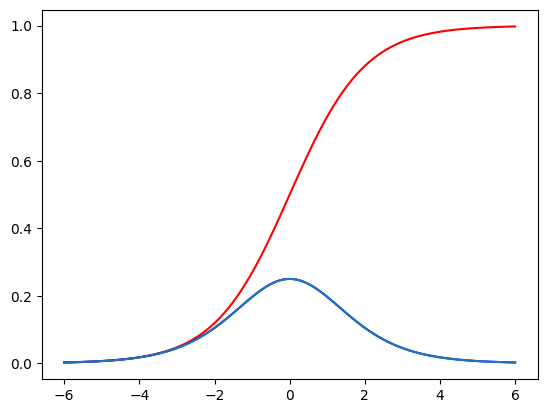

In [ ]:
X = np.linspace(-6, 6, 100)
plt.plot(X, sigmoid(X), c='r')
plt.plot(X, sigmoid_p(X), c='b')
Y = sigmoid_p(X)

plt.plot(X, Y)

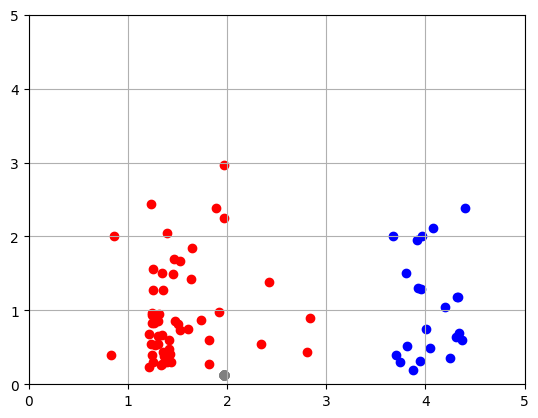

In [ ]:

# scatter data

plt.axis([0, 5, 0, 5])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:
           color = "b"
    plt.scatter(point[0], point[1], c = color)
    plt.scatter(mystery_price[0], mystery_price[1], c = "gray")


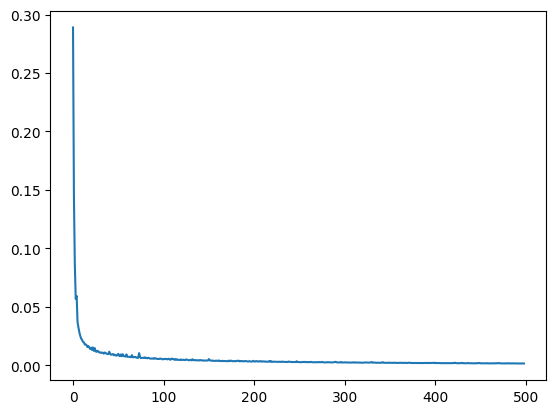

In [ ]:
learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()


for i in range(1, 50000):
    ri = np.random.randint(len(data))
    point = data[ri]

    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)

    target = point[2]
    cost = np.square(pred - target)

    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)

    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1

    dcost_dz = dcost_pred * dpred_dz

    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db

    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db

    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[j]

            z = point[0] * w1 + point[1] * w2 + b
            pred = sigmoid(z)

            target = point[2]
            cost_sum += np.square(pred - target)

        costs.append(cost_sum/len(data))

plt.plot(costs)

In [ ]:
w1

-4.34171797678683

In [ ]:
w2

-0.11445248832201249

In [ ]:
b

13.860797116026713

In [ ]:

# seeing the model prediciton

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print("pred: {}".format(pred))

[1.97 2.96 1.  ]
pred: 0.993096733273725
[1.23 2.44 1.  ]
pred: 0.9997365069222882
[1.89 2.39 1.  ]
pred: 0.9954197398196
[4.4  2.38 0.  ]
pred: 0.0040091496724832636
[1.97 2.25 1.  ]
pred: 0.9936320831091976
[4.08 2.11 0.  ]
pred: 0.01638437627858409
[1.4  2.05 1.  ]
pred: 0.9994729902434096
[3.97 2.   0.  ]
pred: 0.02647485528071425
[3.67 2.   0.  ]
pred: 0.0909398606829306
[0.86 2.   1.  ]
pred: 0.9999497281335517
[3.92 1.95 0.  ]
pred: 0.03286532184961761
[1.65 1.85 1.  ]
pred: 0.9984765076866506
[1.47 1.7  1.  ]
pred: 0.9993139696750536
[1.53 1.67 1.  ]
pred: 0.9991130485401233
[1.25 1.56 1.  ]
pred: 0.9997401389929179
[3.8 1.5 0. ]
pred: 0.056817794210080055
[1.34 1.5  1.  ]
pred: 0.9996185755617941
[1.46 1.49 1.  ]
pred: 0.9993586890895646
[1.64 1.42 1.  ]
pred: 0.9986111052067521
[2.42 1.39 1.  ]
pred: 0.9606362564330009
[3.93 1.3  0.  ]
pred: 0.033864305589078034
[3.96 1.29 0.  ]
pred: 0.02988523648513023
[1.25 1.28 1.  ]
pred: 0.999748332593857
[1.35 1.27 1.  ]
pred: 0.999612

In [ ]:
z = mystery_price[0] * w1 + point[1] * w2 + b
pred = sigmoid(z)
pred

0.9949628588966393

In [ ]:
def which_storage(width, length):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred > .5:
      print("SSD")
    else:
      print("HDD")

In [ ]:
which_storage(.097, 0.124)

SSD


In [ ]:
#Model sucess rate calculation
def which_storage(length, width):
  z = length * w1 + width * w2 + b
  pred = sigmoid(z)
  return(pred)
#########################################
correct = 0
incorrect =  0
for i in range(len(data)):
  point = data[i]
  guess = which_storage(point[0], point[1])

  if (guess < 0.5 and point[2] == 0):
    correct += 1
  elif(guess >= 0.5 and point [2] == 1):
    correct += 1
  else:
    incorrect += 1

print(str(round(correct/len(data) * 100)) + "%")

100%
